In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as img
import tensorflow.keras as keras
import numpy as np
import tensorflow as tf
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
vgg16 = keras.applications.vgg16
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
tf.compat.v1.keras.backend.set_session(tf.compat.v1.Session(config=config))

In [2]:
datasetdir = r'C:\ai\1\DeepFashion\Train'
os.chdir(datasetdir)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
batch_size = 3

def DataLoad(shape, preprocessing): 
   
    imgdatagen = ImageDataGenerator(
        preprocessing_function = preprocessing,
        horizontal_flip = True, 
        validation_split = 0.2,
    )

    height, width = shape

    train_dataset = imgdatagen.flow_from_directory(
        os.getcwd(),
        target_size = (height, width), 
        classes = [ 'Blouse', 'Jeans', 'Shorts', 'Sweater','Sweatpants','Top'],
        batch_size = batch_size,
        subset = 'training', 
    )

    val_dataset = imgdatagen.flow_from_directory(
        os.getcwd(),
        target_size = (height, width), 
        classes = [ 'Blouse', 'Jeans', 'Shorts', 'Sweater','Sweatpants','Top'],
        batch_size = batch_size,
        subset = 'validation'
    )
    return train_dataset, val_dataset

In [3]:
train_dataset, val_dataset = DataLoad((224,224), preprocessing= vgg16.preprocess_input)

Found 4279 images belonging to 6 classes.
Found 1066 images belonging to 6 classes.


In [4]:
X_train, y_train = next(train_dataset)

In [5]:
vgg16 = keras.applications.vgg16
conv_model = vgg16.VGG16(weights='imagenet', include_top=False)
conv_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [6]:
conv_model = vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))

In [7]:
x = keras.layers.Flatten()(conv_model.output)
# three hidden layers
x = keras.layers.Dense(100, activation='relu')(x)
x = keras.layers.Dense(100, activation='relu')(x)
x = keras.layers.Dense(100, activation='relu')(x)
# final softmax layer with 15 categories
predictions = keras.layers.Dense(6, activation='softmax')(x)

# creating the full model:
full_model = keras.models.Model(inputs=conv_model.input, outputs=predictions)
full_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [8]:
for layer in conv_model.layers:
    layer.trainable = False

In [9]:
full_model.compile(loss='categorical_crossentropy',
                  optimizer=keras.optimizers.Adamax(lr=0.0001),
                 
                  metrics=['acc'])

C:\Users\HOME\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [10]:
#full_model.compile(loss='categorical_crossentropy',
 #                 optimizer='adam',
     #             metrics=['acc'])

In [ ]:
history = full_model.fit_generator(
    train_dataset, 
    validation_data = val_dataset,
    workers=2,
    epochs=40,
)

c:\users\home\appdata\local\programs\python\python39\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
 4/34 [==>...........................] - ETA: 5:35 - loss: 12.9823 - acc: 0.2025

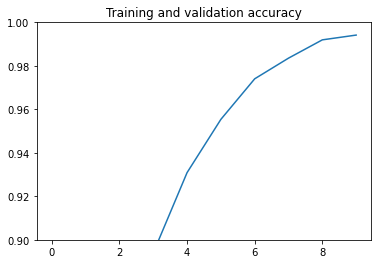

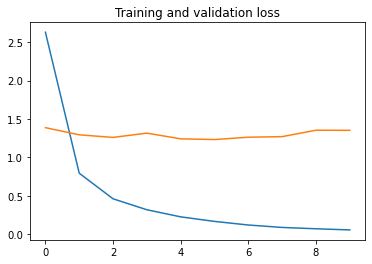

In [102]:
def plot_history(history, yrange):
    '''Plot loss and accuracy as a function of the epoch,
    for the training and validation datasets.
    '''
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Get number of epochs
    epochs = range(len(acc))

    # Plot training and validation accuracy per epoch
    plt.plot(epochs, acc)
    plt.plot(epochs, val_acc)
    plt.title('Training and validation accuracy')
    plt.ylim(yrange)
    
    # Plot training and validation loss per epoch
    plt.figure()

    plt.plot(epochs, loss)
    plt.plot(epochs, val_loss)
    plt.title('Training and validation loss')
    
    plt.show()
    
plot_history(history, yrange=(0.9,1))

In [116]:
from tensorflow.python.keras.models import load_model
full_model.save('model.h5')

Found 397 images belonging to 6 classes.
7/7 [==============================] - 33s 5s/step - loss: 2.0083 - acc: 0.5844
test loss, test acc: [2.0083231925964355, 0.5843828916549683]


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2236260770244087046
]


Predicted label: Shorts


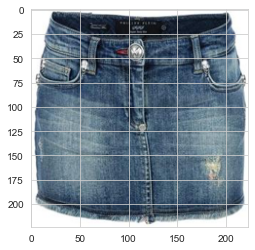

NameError: name 'torch' is not defined

Shape of Image is  (285, 300, 3)


Given Image is ===>


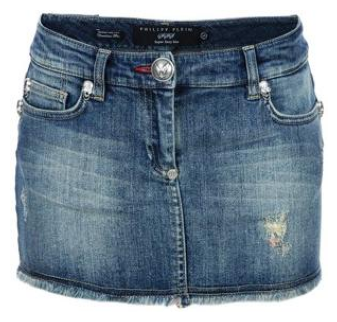

error: OpenCV(4.5.1) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-wvn_it83\opencv\modules\imgproc\src\grabcut.cpp:557: error: (-5:Bad argument) image must have CV_8UC3 type in function 'cv::grabCut'


error: OpenCV(4.5.1) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-wvn_it83\opencv\modules\imgproc\src\grabcut.cpp:386: error: (-215:Assertion failed) !bgdSamples.empty() && !fgdSamples.empty() in function 'initGMMs'
